# Roller Coaster Project

## Project Goals

I will create several data visualizations that will give us insight into the world of roller coasters.

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today I'll be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.
Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. I will load each csv into a DataFrame and inspect it to gain familiarity with the data.

2. Write a function that will plot the ranking of a given roller coaster over time as a line. The function will take a roller coaster’s name and a ranking DataFrame as arguments.
We'll call the function with "El Toro" as the roller coaster name and the wood ranking DataFrame.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [4]:
# Load rankings data from CSV files:
wood_df = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel_df = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

# Combine the rankings into one single DataFrame
w_s_df = pd.concat([wood_df,steel_df])

In [5]:
def get_rank_values (df: pd.DataFrame, name:str, park:str) -> List:
    return df[(df['Name'] == name) & (df['Park'] == park)].Rank.values

def get_year_values(df: pd.DataFrame, name: str, park: str) -> List:
    return df[(df['Name'] == name) & (df['Park'] == park)]['Year of Rank'].values

## 1. Write a function to plot rankings over time for 1 roller coaster

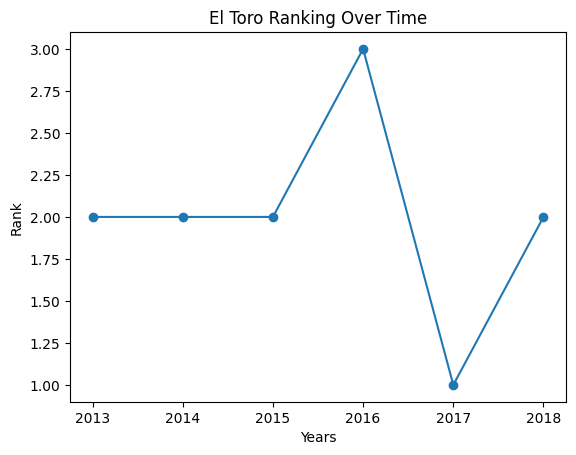

<Figure size 640x480 with 0 Axes>

In [6]:
def rank_plot (name: str, park: str, df: pd.DataFrame) -> None:

  """
  This function takes a name of a rollercoaster, a name of a park, and a
  Pandas DataFrame that has rankings of rollercoasters over time and plots
  the given rollercoaster's rankings over time on plot with the ranking on
  the y-axis and the year on the x-axis.
  """

  # Make a list of the rank values
  rank = get_rank_values(df, name, park)

  # Make a list of the year values
  years = get_year_values(df, name, park)

  # Clear out any lingering figures
  plt.clf()

  # Create a standard plot where x=years and y=rank, the marker is circle
  plt.plot(years, rank, marker='o')

  # Add a title and some axis labels
  plt.title(f'{name} Ranking Over Time')
  plt.xlabel('Years')
  plt.ylabel('Rank')

  # Show the plot
  plt.show()

# Uncomment to test the function rank_plot    
rank_plot ('El Toro', 'Six Flags Great Adventure', w_s_df)

# Clear any lingering figures for the next challenge
plt.clf()

## 3. Write a function that will plot the ranking of two given roller coasters over time as lines. 

The function should take both roller coasters’ names and a ranking DataFrame as arguments.

We'll call the function with "El Toro" as one roller coaster name, “Boulder Dash“ as the other roller coaster name, and the wood ranking DataFrame.

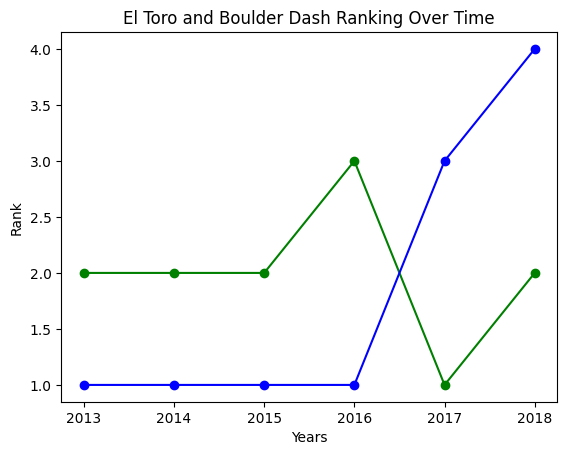

<Figure size 640x480 with 0 Axes>

In [7]:
def rank_plot2 (names: List, parks: List, df: pd.DataFrame) -> None:

  """
  This function takes in 3  arguments (a list of 2 rollercoaster names, a list of 2 park
  names, and a Pandas DataFrame containing the data that ranks all of the rollercoasters
  over time) and plots the rankings of the two rollercoasters over time.
  """
  
  # Define the first & second roller coaster rank & year lists from the input DataFrame
  rank1 = get_rank_values(df, names[0], parks[0])
  rank2 = get_rank_values(df, names[1], parks[1])
  years1 = get_year_values(df, names[0], parks[0])
  years2 = get_year_values(df, names[1], parks[1])
  
  # Clear any lingering figures
  plt.clf()
  
  # First & second plots with corresponding labels and differentiating colors
  plt.plot(years1, rank1, marker='o', label=names[0], color='green')
  plt.plot(years2, rank2, marker='o', label=names[1], color='blue')
  
  # Add a title and some axis labels
  plt.title(f'{names[0]} and {names[1]} Ranking Over Time')
  plt.xlabel('Years')
  plt.ylabel('Rank')
  
  # Show the plot
  plt.show()

# Uncomment to test the rank_plot2 function with two rides @ two parks
rank_plot2 (['El Toro', 'Boulder Dash'], ['Six Flags Great Adventure', 'Lake Compounce'], w_s_df)

# Clear any lingering figures for the next challenge
plt.clf()

## 4. Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. 
The function should take a number n and a ranking DataFrame as arguments.
For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.
We'll call the function with a value for n and either the wood ranking or steel ranking DataFrame.

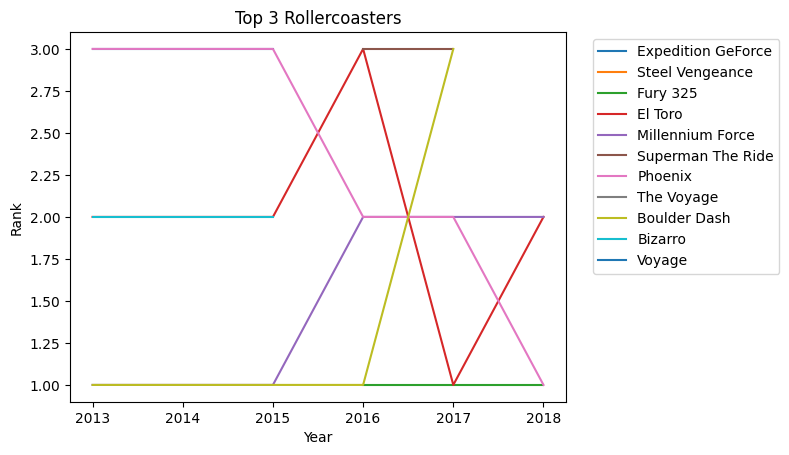

<Figure size 640x480 with 0 Axes>

In [8]:
def top_n_ranks(df: pd.DataFrame, n: int) -> None:

  """
  This function takes in 2 arguments - a Pandas DataFrame with rollercoaster ranking
  data and a number n representing the top n rankings in each year. It then plots the
  ranking of each rollercoaster in the top n rankings on a scatter plot.
  """

  # Create a new DataFrame based on the top n rankings
  top_n_rankings = df[df['Rank'] <= n]
  
  # Create an axis object
  ax = plt.subplot()

  # For loop to iterate through the top_n_rankings for the Name of the roller coaster
  for coaster in set(top_n_rankings['Name']):
    coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
  
  # Add a title, a legend, and some axis labels
  plt.title(f'Top {n} Rollercoasters')
  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
  plt.ylabel('Rank')
  plt.xlabel('Year')
  
  # Show the plot
  plt.show()

# Uncomment to test the top_n_ranks function
top_n_ranks(w_s_df, 3)

# Clear out any lingering figures
plt.clf()

5. Now that we’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv.

In [9]:
# load roller coaster data here:
rc_df = pd.read_csv('roller_coasters.csv')

2802
2802


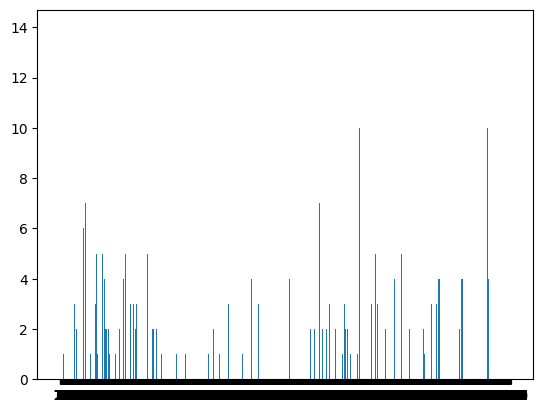

In [11]:
def num_inversion(df: pd.DataFrame) -> None:

  """
  This function takes a single argument of a Pandas DataFrame with data
  representing the number of inversions on a rollercoaster. It will then
  create a bar graph of the data.
  """

  # Create a new DataFrame based on the park name from the input
  
  # This is a list of locations for the bars based on how long the data is
  x_values = list(range(len(df.num_inversions)))
  y_values = df.num_inversions

  # Create an axis object
  ax = plt.subplot()
  
  # Create the plot using the x_values as x locations and park_coaster as heights
  plt.bar(x_values, df.num_inversions, align='center')
  ax.set_xticks(x_values)
  plt.show()

num_inversion(rc_df)